In [1]:
%matplotlib inline


# Creating boxes from error bars using PatchCollection


In this example, we snazz up a pretty standard error bar plot by adding
a rectangle patch defined by the limits of the bars in both the x- and
y- directions. To do this, we have to write our own custom function
called ``make_error_boxes``. Close inspection of this function will
reveal the preferred pattern in writing functions for matplotlib:

  1. an `~.axes.Axes` object is passed directly to the function
  2. the function operates on the ``Axes`` methods directly, not through
     the ``pyplot`` interface
  3. plotting kwargs that could be abbreviated are spelled out for
     better code readability in the future (for example we use
     ``facecolor`` instead of ``fc``)
  4. the artists returned by the ``Axes`` plotting methods are then
     returned by the function so that, if desired, their styles
     can be modified later outside of the function (they are not
     modified in this example).


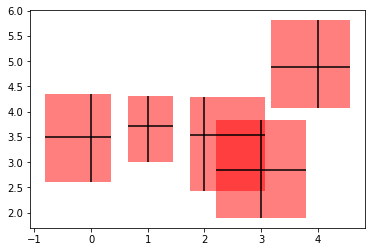

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle

# Number of data points
n = 5

# Dummy data
np.random.seed(19680801)
x = np.arange(0, n, 1)
y = np.random.rand(n) * 5.

# Dummy errors (above and below)
xerr = np.random.rand(2, n) + 0.1
yerr = np.random.rand(2, n) + 0.2


def make_error_boxes(ax, xdata, ydata, xerror, yerror, facecolor='r',
                     edgecolor='None', alpha=0.5):

    # Loop over data points; create box from errors at each point
    errorboxes = [Rectangle((x - xe[0], y - ye[0]), xe.sum(), ye.sum())
                  for x, y, xe, ye in zip(xdata, ydata, xerror.T, yerror.T)]

    # Create patch collection with specified colour/alpha
    pc = PatchCollection(errorboxes, facecolor=facecolor, alpha=alpha,
                         edgecolor=edgecolor)

    # Add collection to axes
    ax.add_collection(pc)

    # Plot errorbars
    artists = ax.errorbar(xdata, ydata, xerr=xerror, yerr=yerror,
                          fmt='None', ecolor='k')

    return artists


# Create figure and axes
fig, ax = plt.subplots(1)

# Call function to create error boxes
_ = make_error_boxes(ax, x, y, xerr, yerr)

plt.show()

------------

References
""""""""""

The use of the following functions and methods is shown in this example:



In [ ]:
import matplotlib
matplotlib.axes.Axes.errorbar
matplotlib.pyplot.errorbar
matplotlib.axes.Axes.add_collection
matplotlib.collections.PatchCollection